In [1]:
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from ProcesamientoCNN import extraerImagenesPositivas,extraerImagenesOtros,extraerImagenesNegativas,processImage,extractorDataset
from ProcesamientoCNN import build_complete_siamese_network, contrastive_loss

In [3]:
dataInput=(150,220)

In [4]:
model = build_complete_siamese_network((150, 220, 1))  # Tamaño de imagen ejemplo
model.compile(loss=contrastive_loss, optimizer=Adam(learning_rate=0.001))
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 220, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_3 (InputLayer)           [(None, 150, 220, 1  0           []                               
                                )]                                                                
                                                                                                  
 model (Functional)             (None, 4096)         35326276    ['input_2[0][0]',                
                                                                  'input_3[0][0]']          

In [5]:
#weights verdaderos    falsos solo de otras firmas                                                                      train: 100%  otros: 97% negativos: 60% 36.58.50
#weights2 verdaderos   falsos todos los de la misma y aleatorio de cada uno de los otros                                train: 100%  otros: 92% negativos: 83% 63.55.67
#weights3 verdaderos   6 falsos aleatorios de la misma y 6 aleatorios de cada uno de los otros                          train: 100%  otros: 56% negativos: 100% 48.39.43
#weights4 verdaderos   6 falsos aleatorios de la misma y aleatorios de cada uno de los otros                            train: 100%  otros: 78% negativos: 78% 33.34.34
model.load_weights('weights/')

In [6]:
# Usar el generador para la validacion
val_generator = extractorDataset("./val/", dataInput, 512)

In [7]:
datos=next(val_generator)

In [8]:
model.evaluate(datos[0],datos[1])

16/16 [==============================] - 4s 9ms/step - loss: 0.0757


0.07574779540300369

In [9]:
resultado=model.predict(datos[0])

16/16 [==============================] - 1s 22ms/step


In [27]:
umbral=0.27
print("tamaño posi: ",len(resultado))
data={
    'verdadero':datos[1],
    'predicho':list(resultado)
}
df = pd.DataFrame(data)
df['final']=df['predicho'].apply(lambda x:1 if x<umbral else 0)
df['comparacion']=df['verdadero']==df['final']
print(df.groupby('verdadero')['comparacion'].value_counts())
print(len(df[df['comparacion']==True])/len(df['comparacion']),"%\n")

tamaño posi:  512
verdadero  comparacion
0.0        True           244
           False           12
1.0        True           203
           False           53
Name: count, dtype: int64
0.873046875 %



tamaño:  65
3
1/1 [==============================] - 0s 14ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.2886667847633362


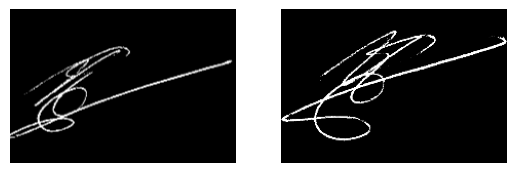

9
1/1 [==============================] - 0s 14ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.4442371428012848


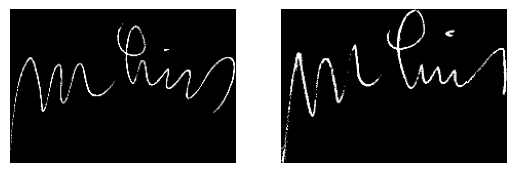

15
1/1 [==============================] - 0s 15ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.2977728545665741


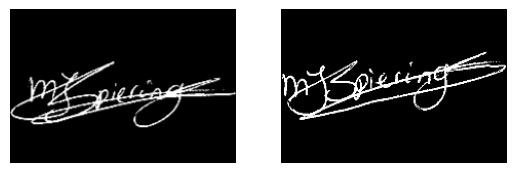

26
1/1 [==============================] - 0s 17ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.5752589702606201


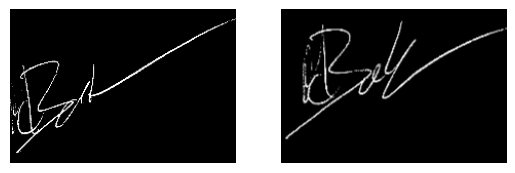

27
1/1 [==============================] - 0s 13ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.6884709596633911


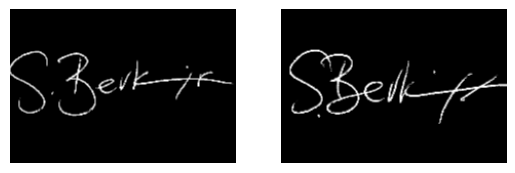

30
1/1 [==============================] - 0s 23ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.7012579441070557


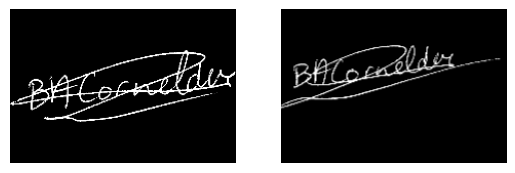

35
1/1 [==============================] - 0s 14ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.2798057198524475


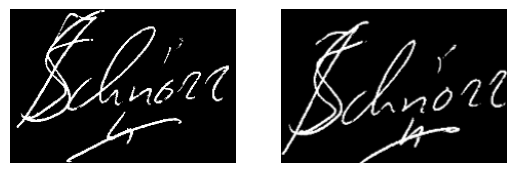

36
1/1 [==============================] - 0s 18ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.33795374631881714


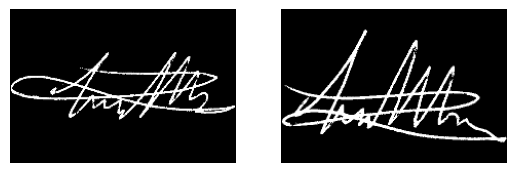

40
1/1 [==============================] - 0s 14ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.5152817368507385


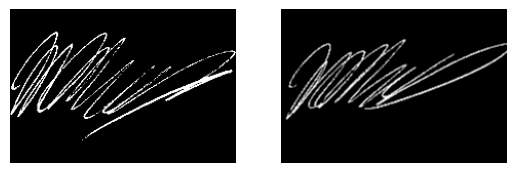

55
1/1 [==============================] - 0s 14ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.3056151866912842


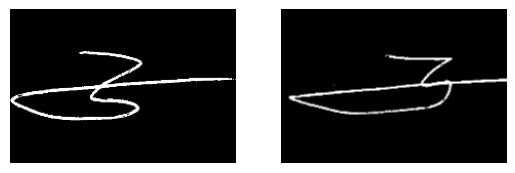

57
1/1 [==============================] - 0s 14ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.43422749638557434


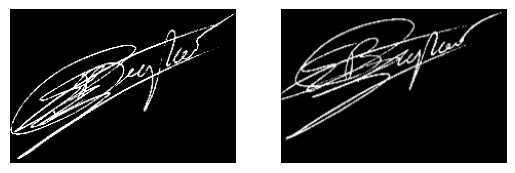

65
1/1 [==============================] - 0s 14ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.41131412982940674


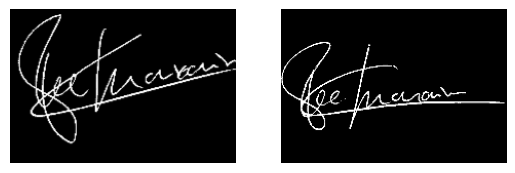

67
1/1 [==============================] - 0s 15ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.880434513092041


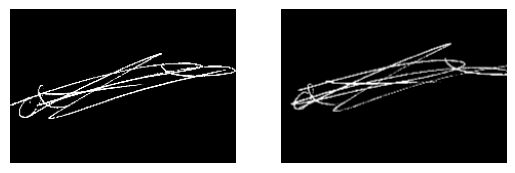

68
1/1 [==============================] - 0s 14ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.8615497946739197


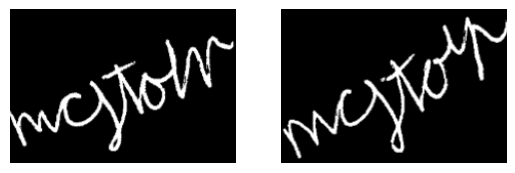

73
1/1 [==============================] - 0s 14ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.4841776192188263


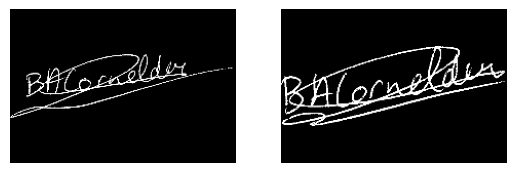

74
1/1 [==============================] - 0s 15ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.4726722240447998


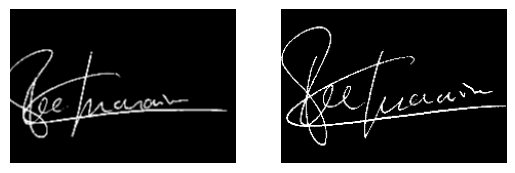

76
1/1 [==============================] - 0s 15ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.36409324407577515


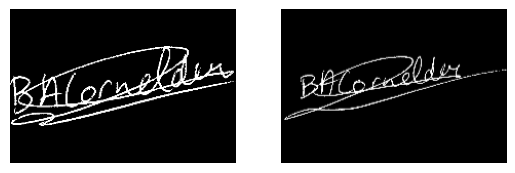

78
1/1 [==============================] - 0s 13ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.6578177809715271


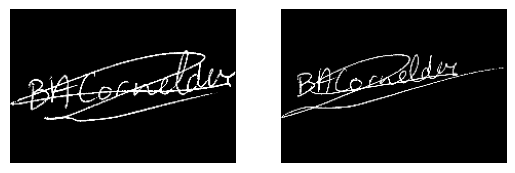

86
1/1 [==============================] - 0s 13ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.5825936794281006


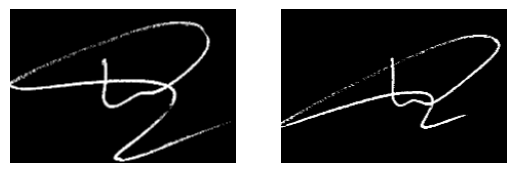

89
1/1 [==============================] - 0s 23ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.32038676738739014


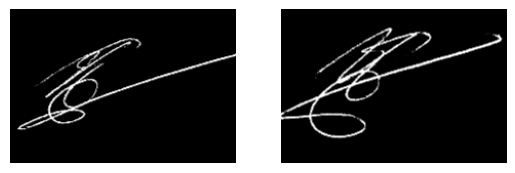

95
1/1 [==============================] - 0s 14ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.7874004244804382


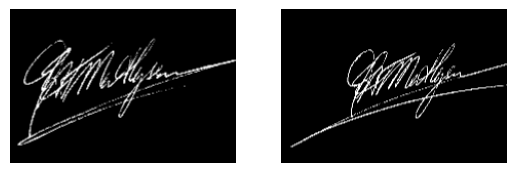

99
1/1 [==============================] - 0s 14ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.3646151125431061


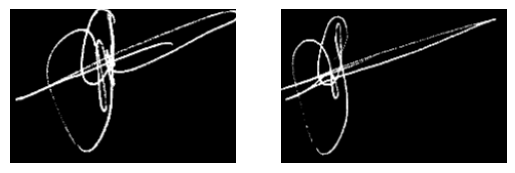

101
1/1 [==============================] - 0s 14ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.29291215538978577


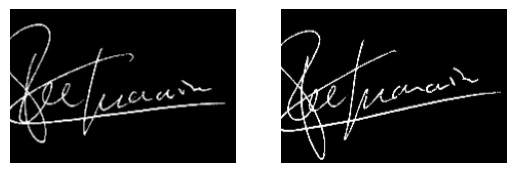

103
1/1 [==============================] - 0s 13ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.4240663945674896


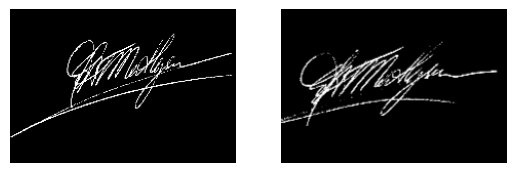

107
1/1 [==============================] - 0s 16ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.49993109703063965


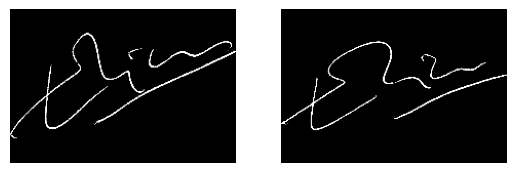

111
1/1 [==============================] - 0s 13ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.3391808271408081


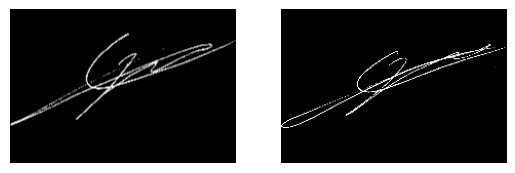

126
1/1 [==============================] - 0s 14ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.48289549350738525


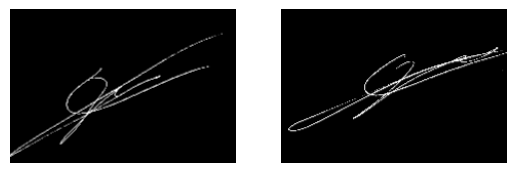

128
1/1 [==============================] - 0s 14ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.2827940285205841


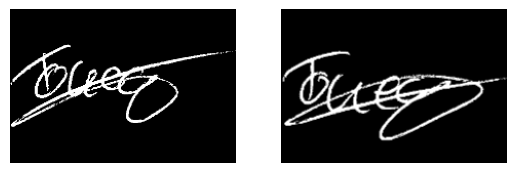

130
1/1 [==============================] - 0s 15ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.2957250475883484


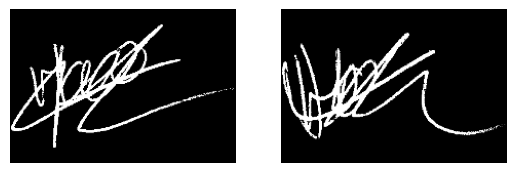

133
1/1 [==============================] - 0s 14ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.2820218503475189


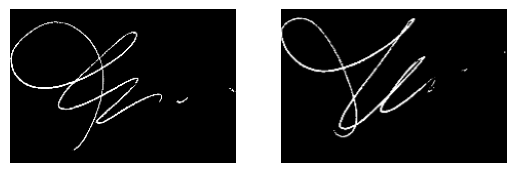

139
1/1 [==============================] - 0s 14ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.3909624516963959


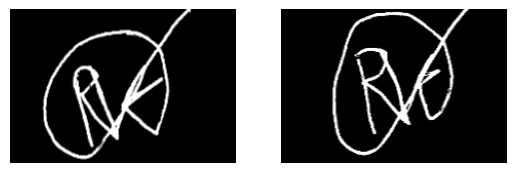

148
1/1 [==============================] - 0s 14ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.32185059785842896


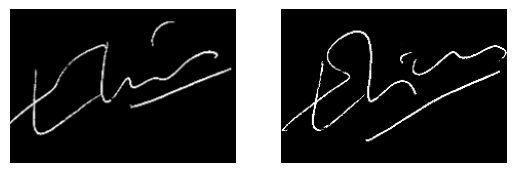

150
1/1 [==============================] - 0s 32ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.3276700973510742


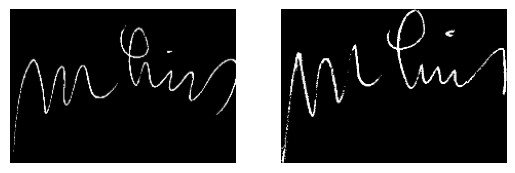

155
1/1 [==============================] - 0s 13ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.33795374631881714


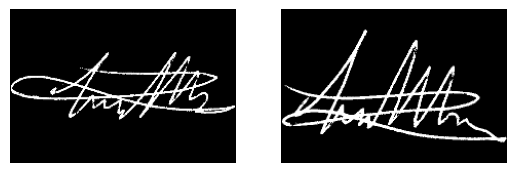

164
1/1 [==============================] - 0s 14ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.2995271682739258


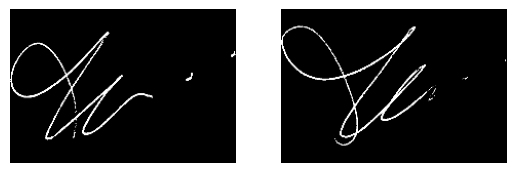

169
1/1 [==============================] - 0s 13ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.3480471968650818


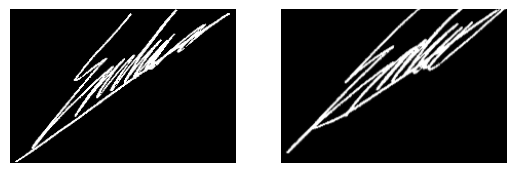

170
1/1 [==============================] - 0s 13ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.48721787333488464


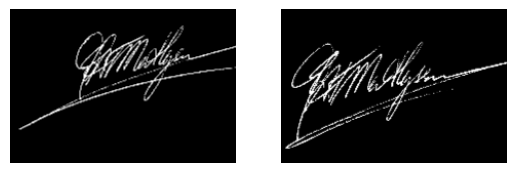

175
1/1 [==============================] - 0s 32ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.2858237624168396


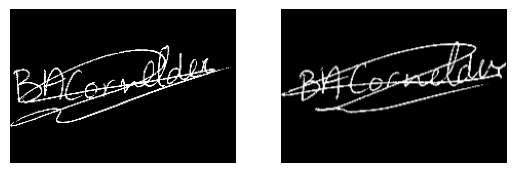

176
1/1 [==============================] - 0s 14ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.4126729965209961


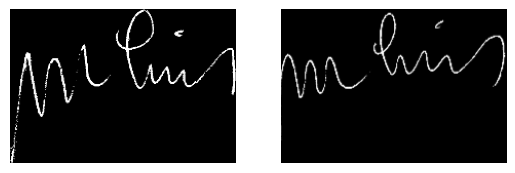

178
1/1 [==============================] - 0s 40ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.27063533663749695


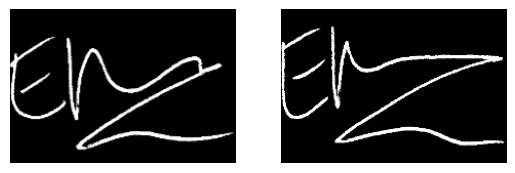

179
1/1 [==============================] - 0s 29ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.4319852590560913


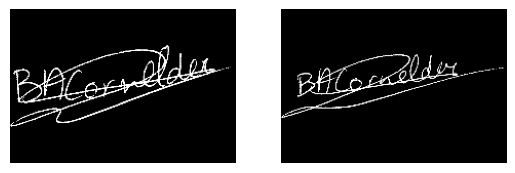

195
1/1 [==============================] - 0s 14ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.9545567631721497


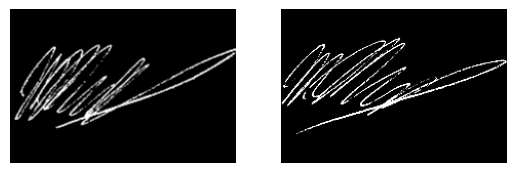

198
1/1 [==============================] - 0s 23ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.37667152285575867


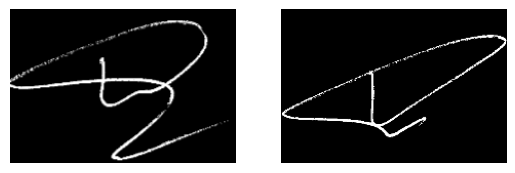

199
1/1 [==============================] - 0s 30ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.3130316436290741


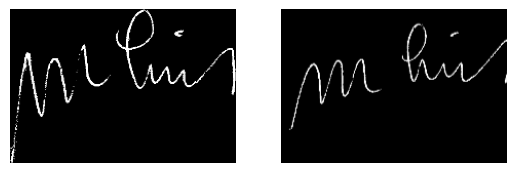

200
1/1 [==============================] - 0s 15ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.4296027719974518


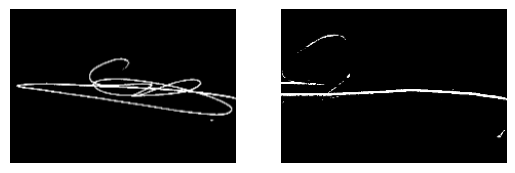

206
1/1 [==============================] - 0s 15ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.27085161209106445


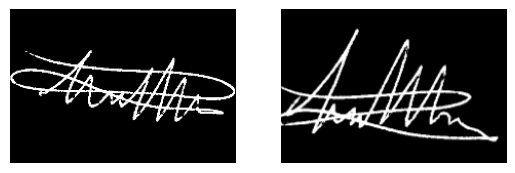

211
1/1 [==============================] - 0s 25ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.3813101649284363


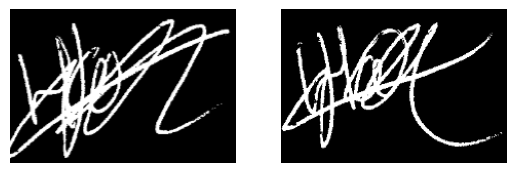

213
1/1 [==============================] - 0s 14ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.33308956027030945


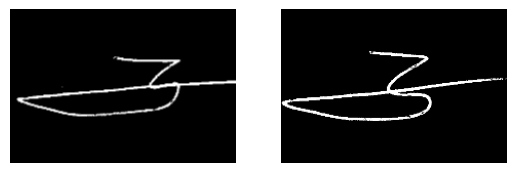

215
1/1 [==============================] - 0s 12ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.33449026942253113


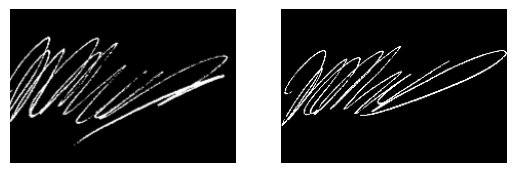

216
1/1 [==============================] - 0s 14ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.3122116029262543


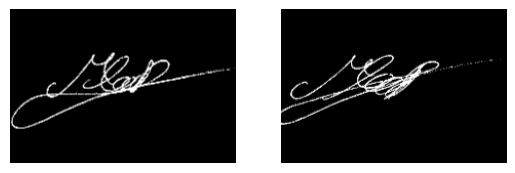

219
1/1 [==============================] - 0s 22ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.3623872399330139


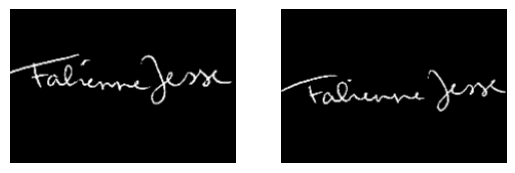

220
1/1 [==============================] - 0s 15ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.3185514807701111


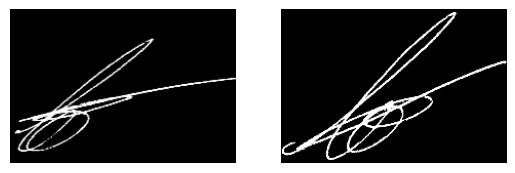

225
1/1 [==============================] - 0s 22ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 1.0-0.41239267587661743


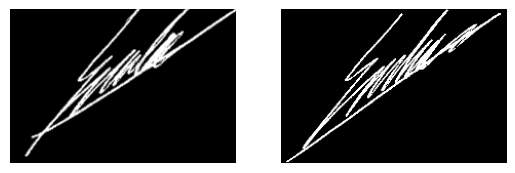

264
1/1 [==============================] - 0s 13ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 0.0-0.23252543807029724


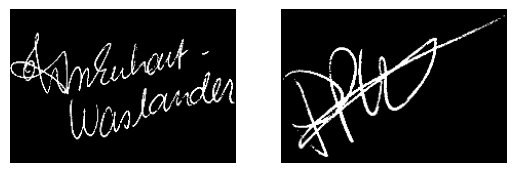

321
1/1 [==============================] - 0s 24ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 0.0-0.1642620861530304


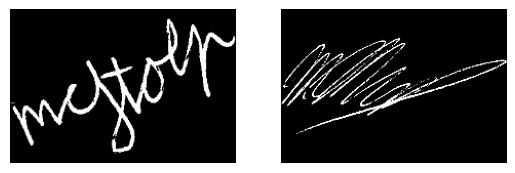

330
1/1 [==============================] - 0s 13ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 0.0-0.10502952337265015


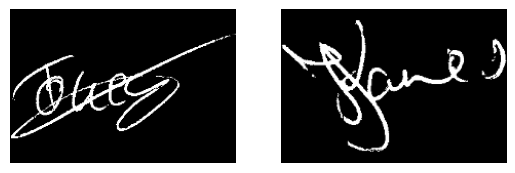

331
1/1 [==============================] - 0s 14ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 0.0-0.15690433979034424


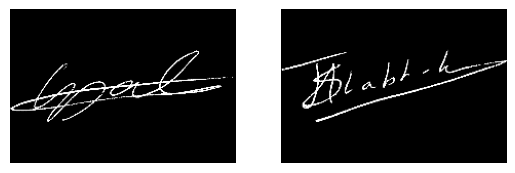

335
1/1 [==============================] - 0s 15ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 0.0-0.17390958964824677


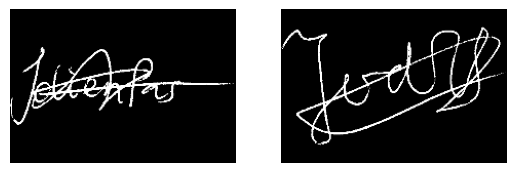

381
1/1 [==============================] - 0s 15ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 0.0-0.25673821568489075


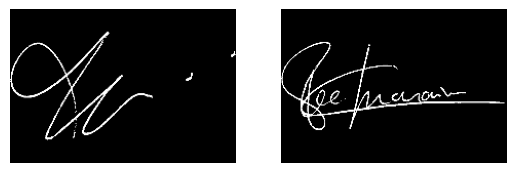

423
1/1 [==============================] - 0s 16ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 0.0-0.23718248307704926


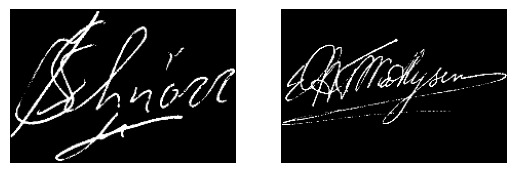

424
1/1 [==============================] - 0s 29ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 0.0-0.243697389960289


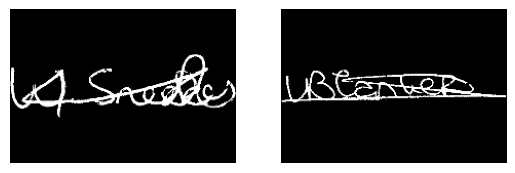

478
1/1 [==============================] - 0s 13ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 0.0-0.1853296011686325


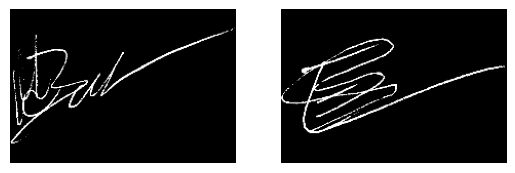

499
1/1 [==============================] - 0s 19ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 0.0-0.1680322140455246


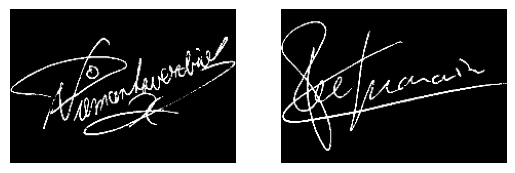

501
1/1 [==============================] - 0s 14ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 0.0-0.14972944557666779


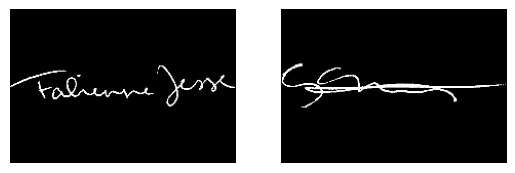

505
1/1 [==============================] - 0s 16ms/step
a shape=(150, 220), dtype=float32
b shape=(150, 220), dtype=float32
y shape=(), dtype=float32 0.0-0.13295568525791168


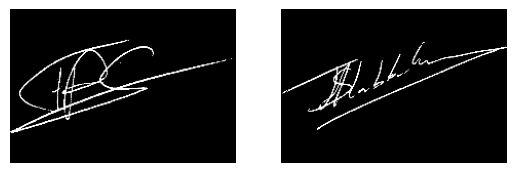

In [28]:
falsos=df[df['comparacion']==False].index
print("tamaño: ",len(falsos))
for i in falsos:
    print(i)
    a=datos[0][0][i]
    b=datos[0][1][i]
    y=datos[1][i]
    prediction=model.predict([np.array([a]),np.array([b])])[0][0]
    print(f'a shape={a.shape}, dtype={a.dtype}')
    print(f'b shape={b.shape}, dtype={b.dtype}')
    print(f'y shape={y.shape}, dtype={y.dtype} {y}-{prediction}')
    fig, axes = plt.subplots(1, 2)
    # Mostrar la primera imagen en el subplot 1
    axes[0].imshow(a,cmap='gray')
    axes[0].axis('off')  # Opcional: Oculta los ejes
    # Mostrar la segunda imagen en el subplot 2
    axes[1].imshow(b,cmap='gray')
    axes[1].axis('off')
    plt.show()

1/1 [==============================] - 0s 16ms/step
a shape=(150, 220), dtype=uint8
b shape=(150, 220), dtype=uint8
0.4112975001335144


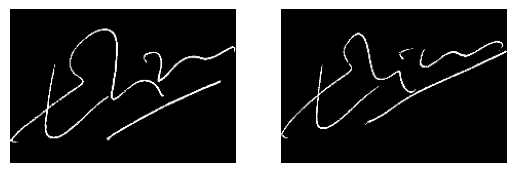

In [36]:
imagenA="train/001/001_02.png"
imagenB="val/001/001_04.png"
a=processImage(imagenA,dataInput) 
b=processImage(imagenB,dataInput) 
prediction=model.predict([np.array([a]),np.array([b])])[0][0]
print(f'a shape={a.shape}, dtype={a.dtype}')
print(f'b shape={b.shape}, dtype={b.dtype}')
print(f'{prediction}')
fig, axes = plt.subplots(1, 2)
# Mostrar la primera imagen en el subplot 1
axes[0].imshow(a,cmap='gray')
axes[0].axis('off')  # Opcional: Oculta los ejes
# Mostrar la segunda imagen en el subplot 2
axes[1].imshow(b,cmap='gray')
axes[1].axis('off')
plt.show()